# Unit 5 - Financial Planning


In [1]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [53]:
# Load .env enviroment variables

from dotenv import load_dotenv
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [54]:
# Set current amount of crypto assets

crypto_assets = {
    "shares": [1.2, 5.3]
}

# Set the variables

variables = ["my_btc", "my_eth"]

# Create the shares DataFrame
df_shares = pd.DataFrame(crypto_assets, index=variables)

# Display shares data
df_shares

,shares
my_btc,1.2
my_eth,5.3


In [55]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [56]:
# Fetch current BTC price

# Execute get request
requests.get(btc_url)

# Execute GET request and store response
response_data = requests.get(btc_url)

# Get content
response_content = response_data.content

# Formatting as json
import json
data = response_data.json()

# Find Current Price
btc_price = data["data"]["1"]["quotes"]["USD"]['price']


# Fetch current ETH price

# Execute get request
requests.get(eth_url)

# Execute GET request and store response
response_data2 = requests.get(eth_url)

# Get content
response_content2 = response_data2.content

# Formatting as json
data2 = response_data2.json()

# Find Current Price
eth_price = data2["data"]["1027"]["quotes"]["USD"]['price']


# Compute current value of my crpto

my_btc = df_shares.loc["my_btc"]["shares"]
my_eth = df_shares.loc["my_eth"]["shares"]
my_btc_value = btc_price * df_shares.loc["my_btc"]["shares"]
my_eth_value = eth_price * df_shares.loc["my_eth"]["shares"]

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40147.20
The current value of your 5.3 ETH is $5253.94


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [57]:
# Current amount of shares

invest_shares = {
    "shares": [200, 500]
}

# Set the tickers

variables = ["my_agg", "my_spy"]

# Create the shares DataFrame
df_shares2 = pd.DataFrame(invest_shares, index=variables)

# Display shares data
df_shares2

,shares
my_agg,200
my_spy,500


In [58]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [59]:
# Format current date as ISO format

today = pd.Timestamp("2020-01-03", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2020-01-03 00:00:00-05:00  112.89  113.05  112.7814  113.02  3465113  321.16   

                                                            
                             high    low   close    volume  
time                                                        
2020-01-03 00:00:00-05:00  323.64  321.1  322.44  58408809

In [60]:
# Pick AGG and SPY close prices

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.02
Current SPY closing price: $322.44


In [61]:
# Compute the current value of shares

my_spy = df_shares2.loc["my_spy"]["shares"]
my_agg = df_shares2.loc["my_agg"]["shares"]

my_agg_value = agg_close_price * df_shares2.loc["my_agg"]["shares"]
my_spy_value = spy_close_price * df_shares2.loc["my_spy"]["shares"]

# Print current value of share

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 500 SPY shares is $161220.00
The current value of your 200 AGG shares is $22604.00


### Savings Health Analysis

In [62]:
# Set monthly household income

monthly_income = 12000

# Create savings DataFrame

df_savings = {
    "amount": [(my_eth_value + my_btc_value), (my_agg_value + my_spy_value)],
}

# Set the variables

variables = ["crypto", "shares"]

# Create the savings DataFrame

df_savings = pd.DataFrame(df_savings, index=variables)

# Display savings DataFrame
display(df_savings)

,amount
crypto,45401.143
shares,183824.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

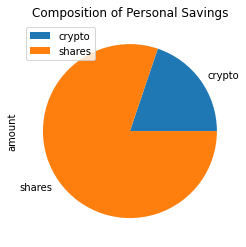

In [63]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [64]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings_df = df_savings.loc['crypto'] + df_savings.loc['shares']
total_savings = total_savings_df[0]

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

elif total_savings == emergency_fund:
    print("Congratulations! You have reached this financial goal.")

elif total_savings < emergency_fund:
    print(f"You are {total_savings - emergency_fund} away from reaching the financial goal.")
    

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [65]:
# Set start and end dates of five years back from today.

start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-01-03', tz='America/New_York').isoformat()

In [70]:
# Get 5 years' worth of historical data for SPY and AGG

tickers = ["AGG","SPY"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data

df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [71]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [72]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [73]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991107,1.000115,0.997321,0.997655,0.997562,0.999009,1.000092,1.000988,1.005473,0.997543,...,0.995314,0.986409,1.002047,1.006596,1.002331,1.006111,0.997065,1.006373,1.007451,1.003040
2,0.990966,1.004714,1.001214,1.004549,0.996406,1.005197,0.998492,0.998080,1.007899,0.985908,...,1.003094,0.990417,1.004553,1.016219,1.002037,0.990599,1.001648,0.992614,1.015382,1.003828
3,0.979963,1.002820,1.009816,1.003787,1.006484,1.008639,1.000372,0.994976,1.006527,0.990198,...,1.001585,0.993640,1.004142,1.012771,1.009800,0.989899,1.005487,0.993169,1.009395,1.012237
4,0.982141,1.001969,1.018245,1.005651,0.998910,1.016439,1.001454,0.991875,1.003695,0.993144,...,1.008474,0.993570,1.007881,1.012059,1.002834,0.987290,1.011005,0.994486,1.015143,1.014588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.881646,8.292056,7.901560,5.279747,6.658944,7.798409,5.312614,12.208147,2.701413,5.450789,...,9.767198,7.378682,3.485205,10.155603,5.641368,4.666444,7.414531,12.462548,3.884023,5.657481
7557,9.901666,8.275497,7.873800,5.290527,6.596016,7.811855,5.287186,12.209457,2.693606,5.438957,...,9.811256,7.371526,3.486145,10.100089,5.643763,4.679297,7.418029,12.503454,3.903697,5.699098
7558,9.862886,8.271556,7.871547,5.319912,6.585389,7.860617,5.262269,12.212946,2.684278,5.450131,...,9.827086,7.389571,3.508155,10.078317,5.679571,4.662176,7.402923,12.498280,3.910035,5.710912
7559,9.894815,8.245059,7.883863,5.336268,6.640943,7.820960,5.258253,12.141317,2.702895,5.450548,...,9.811547,7.378579,3.500619,9.980060,5.698210,4.696335,7.449699,12.489742,3.892117,5.692676


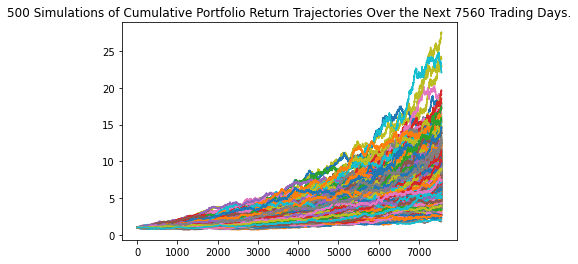

In [74]:
# Plot simulation outcomes

line_plot = MC_thirtyyear.plot_simulation()

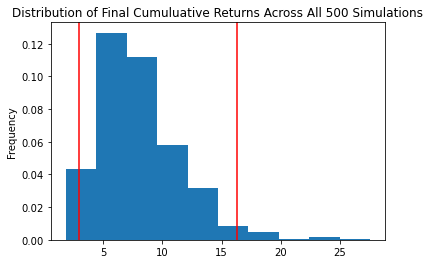

In [75]:
# Plot probability distribution and confidence intervals

dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              8.011122
std               3.523096
min               1.834028
25%               5.540559
50%               7.305369
75%               9.739872
max              27.543819
95% CI Lower      2.939012
95% CI Upper     16.329396
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [77]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $58780.24 and $326587.93


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [78]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $88170.36 and $489881.89


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [81]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991098,1.001809,1.003371,1.007788,1.003474,0.998015,1.006197,1.008118,0.994236,0.998394,...,1.004313,1.002291,1.005582,0.989689,0.995563,0.992170,0.995550,1.003292,1.001759,0.994527
2,0.990906,1.012694,1.008348,1.012627,1.009325,0.999885,1.008303,1.003740,0.998647,0.996250,...,0.990935,0.996381,1.013705,0.984380,1.007996,0.994713,0.999151,1.007021,1.006344,0.994598
3,0.995638,1.002879,1.016452,1.005355,0.997603,1.002680,1.013788,1.004407,1.006109,0.991032,...,0.993225,0.988146,1.021355,0.982005,1.003772,0.995757,0.999360,1.007490,1.004934,0.998233
4,0.997129,1.006757,1.019202,1.002623,0.989103,1.002575,1.003702,1.002557,1.009223,0.992743,...,0.991048,0.983488,1.027289,0.975128,1.002015,0.989550,0.996920,1.004320,1.012389,1.005230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.476676,1.234609,1.748691,1.272008,1.726643,1.181872,1.081877,1.643923,1.246945,1.111189,...,1.389921,1.207120,1.625335,1.278131,1.288813,1.178411,1.129458,1.359521,1.696188,1.063293
1257,1.466948,1.244853,1.754759,1.274152,1.716837,1.186424,1.077085,1.643037,1.240378,1.110188,...,1.378039,1.213719,1.626588,1.280974,1.282868,1.190037,1.132896,1.359821,1.706823,1.067816
1258,1.482980,1.262765,1.760084,1.266479,1.726244,1.181959,1.082158,1.643015,1.244007,1.108074,...,1.381886,1.208217,1.638750,1.278306,1.282935,1.195517,1.126903,1.366804,1.706165,1.062199
1259,1.482945,1.265812,1.760105,1.277353,1.716454,1.180958,1.085072,1.653183,1.246723,1.098038,...,1.375121,1.203549,1.650927,1.267806,1.284509,1.188159,1.118684,1.373998,1.703980,1.062035


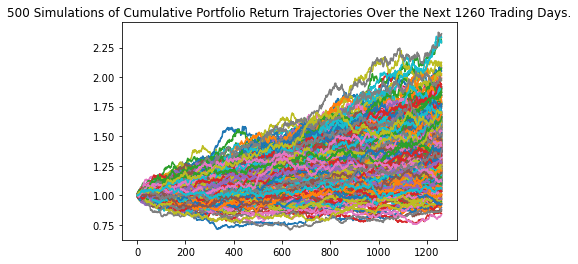

In [82]:
# Plot simulation outcomes

line_plot2 = MC_fiveyear.plot_simulation()

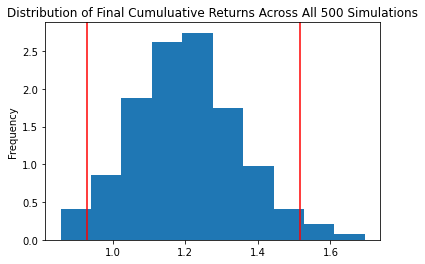

In [27]:
# Plot probability distribution and confidence intervals

dist_plot2 = MC_thirtyyear.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              1.395199
std               0.269067
min               0.834511
25%               1.192713
50%               1.384766
75%               1.571490
max               2.366714
95% CI Lower      0.935905
95% CI Upper      1.978071
Name: 1260, dtype: float64


In [86]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56154.31 and $118684.26


### Ten Years Retirement Option

In [87]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [88]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998714,1.005700,1.002768,1.000803,1.000602,1.000259,1.001848,1.000869,1.007926,1.006791,...,1.002684,1.001494,1.005897,1.002086,1.008804,0.993483,1.006990,0.997980,1.008996,1.001530
2,1.007963,1.007477,0.996580,1.000756,0.997708,0.999005,1.005627,0.997992,1.013411,1.007490,...,1.011487,0.997710,1.018332,1.004913,1.014421,0.988426,1.003534,1.006188,1.006418,1.007648
3,1.008856,1.005671,1.003410,1.004457,0.994659,1.002456,1.009093,1.000399,1.017063,1.009609,...,1.008971,0.994109,1.022723,0.999345,1.016275,0.982222,1.014378,0.996681,1.007097,1.005850
4,1.004143,1.014177,1.002917,1.012287,0.999582,0.997221,1.016189,1.003010,1.016787,1.004889,...,1.011017,0.991807,1.022678,1.000774,1.024943,0.973917,1.012332,0.988495,1.005693,1.005255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.119317,2.006270,2.351575,1.338669,2.743040,2.445015,1.523459,1.566033,2.033005,1.971999,...,1.997985,1.336484,1.771254,0.992875,1.102800,1.976118,2.316747,2.072414,1.801670,2.256070
2517,2.120483,2.014064,2.366349,1.352584,2.739742,2.446308,1.525532,1.573639,2.034679,1.974248,...,2.011512,1.336586,1.767047,1.001051,1.102923,1.955541,2.306404,2.072628,1.794670,2.257373
2518,2.118675,2.023745,2.351300,1.350931,2.743776,2.445496,1.516661,1.568507,2.014260,1.960405,...,2.005072,1.334485,1.762047,0.998795,1.095134,1.948972,2.315744,2.091903,1.790726,2.261794
2519,2.120957,2.021565,2.371377,1.333747,2.742165,2.438949,1.515448,1.574572,2.022178,1.978601,...,2.013643,1.329395,1.762666,0.995405,1.094026,1.948897,2.303207,2.093198,1.799721,2.266461


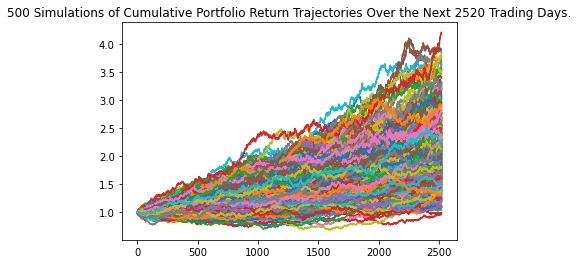

In [89]:
# Plot simulation outcomes

line_plot3 = MC_tenyear.plot_simulation()

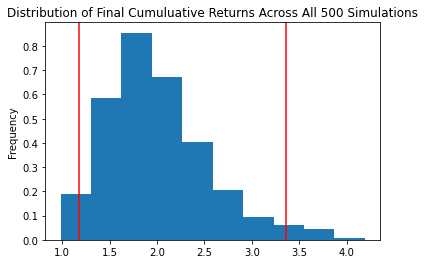

In [90]:
# Plot probability distribution and confidence intervals

dist_plot3 = MC_tenyear.plot_distribution()

In [91]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              2.006172
std               0.543669
min               0.983911
25%               1.629585
50%               1.908884
75%               2.295010
max               4.188996
95% CI Lower      1.181213
95% CI Upper      3.358003
Name: 2520, dtype: float64


In [92]:
# Set initial investment

initial_investment = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70872.75 and $201480.16
